In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
homi=pd.read_csv("database.csv", low_memory=False)

homi

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
5,6,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,...,Unknown,Male,36,White,Unknown,Acquaintance,Rifle,0,0,FBI
6,7,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,...,Unknown,Male,27,Black,Unknown,Wife,Knife,0,0,FBI
7,8,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,1,Murder or Manslaughter,...,Unknown,Male,35,White,Unknown,Wife,Knife,0,0,FBI
8,9,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI
9,10,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,3,Murder or Manslaughter,...,Unknown,Male,40,Unknown,Unknown,Unknown,Firearm,0,1,FBI


In [2]:
#Question 1
solved = homi["Crime Solved"].value_counts().Yes
print solved

448172


In [3]:
#Question 2
weapon_list = homi[homi['Weapon']!='Unknown']
weapon_count = weapon_list['Weapon'].value_counts()
print weapon_count[0:5]

Handgun         317484
Knife            94962
Blunt Object     67337
Firearm          46980
Shotgun          30722
Name: Weapon, dtype: int64


In [130]:
#Question 3

sub_df = weapon_list[['State', 'Weapon']].copy()
wep = sub_df.groupby('State').Weapon.value_counts()
top_wep = a.groupby(level=0).nlargest(1)
tot_wep = a.groupby(level=0).sum()
ratio_wep = top_wep/tot_wep
ratio_wep

State                 State                 Weapon      
Alabama               Alabama               Handgun         0.613187
Alaska                Alaska                Handgun         0.361716
Arizona               Arizona               Handgun         0.569836
Arkansas              Arkansas              Handgun         0.480944
California            California            Handgun         0.569964
Colorado              Colorado              Handgun         0.435377
Connecticut           Connecticut           Handgun         0.495327
Delaware              Delaware              Handgun         0.401084
District of Columbia  District of Columbia  Handgun         0.553433
Florida               Florida               Handgun         0.428296
Georgia               Georgia               Handgun         0.596402
Hawaii                Hawaii                Blunt Object    0.311462
Idaho                 Idaho                 Handgun         0.391020
Illinois              Illinois              Ha

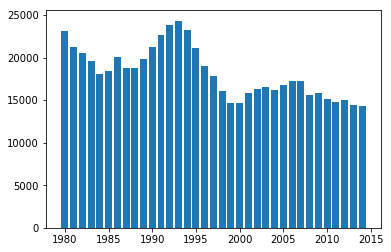

In [4]:
year_df=homi.groupby('Year').Year.agg(['count'])
year=year_df.index.tolist()
plt.bar(year, year_df['count'])
plt.show()

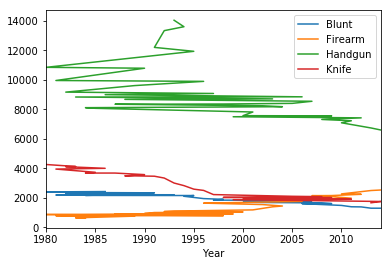

In [9]:
year_wep = weapon_list['Year'].groupby(weapon_list["Weapon"]).value_counts()
handgun= year_wep['Handgun']
knife= year_wep['Knife']
blunt= year_wep['Blunt Object']
firearm=year_wep['Firearm']
blunt.plot(kind='line',label='Blunt',legend=True)
firearm.plot(kind='line',label='Firearm',legend=True)
handgun.plot(kind='line',label='Handgun',legend=True)
knife.plot(kind='line',label='Knife',legend=True)
plt.show()

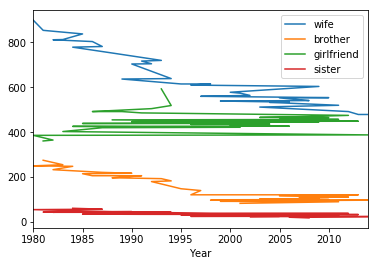

In [11]:
rel_homi = weapon_list['Year'].groupby(weapon_list['Relationship']).value_counts()
wife = rel_homi['Wife']
brother = rel_homi['Brother']
girlfriend = rel_homi['Girlfriend']
sister = rel_homi['Sister']
wife.plot(kind='line',label='wife',legend=True)
brother.plot(kind='line',label='brother',legend=True)
girlfriend.plot(kind='line',label='girlfriend',legend=True)
sister.plot(kind='line',label='sister',legend=True)
plt.show()

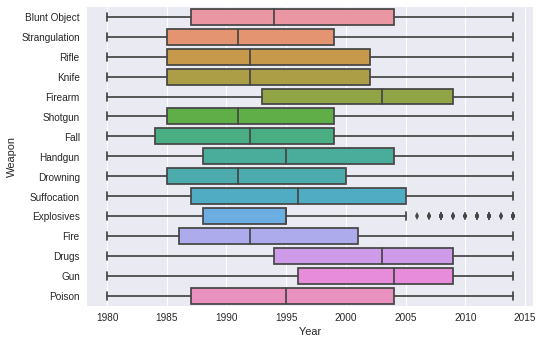

In [13]:
sb.boxplot(x = weapon_list['Year'], y = weapon_list['Weapon'])
plt.show()